## Zomato EDA

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.dtypes

plotting

In [ ]:
plt.figure(figsize=(3, 3 ))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')

## Country EDA

In [ ]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.shape

In [37]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [38]:
final_df = pd.merge(df, df_country, on='Country Code', how='left')
final_df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [52]:
country_values = final_df.Country.value_counts().values
country_names = final_df.Country.value_counts().index

([<matplotlib.patches.Wedge at 0x2df49173140>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

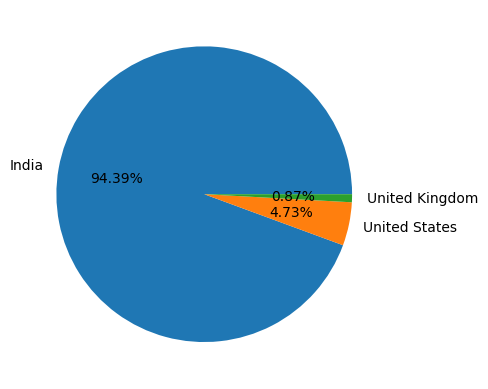

In [59]:
# Plot the data
plt.pie(country_values[:3], labels=country_names[:3], autopct="%1.2f%%")

In [68]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


---
### Observation
1. When rating is from 4.5 to 4.9 -> Excellant
2. When rating is from 4.0 to 4.4 -> Very good
3. When rating is from 3.5 to 3.9 -> Good
---

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

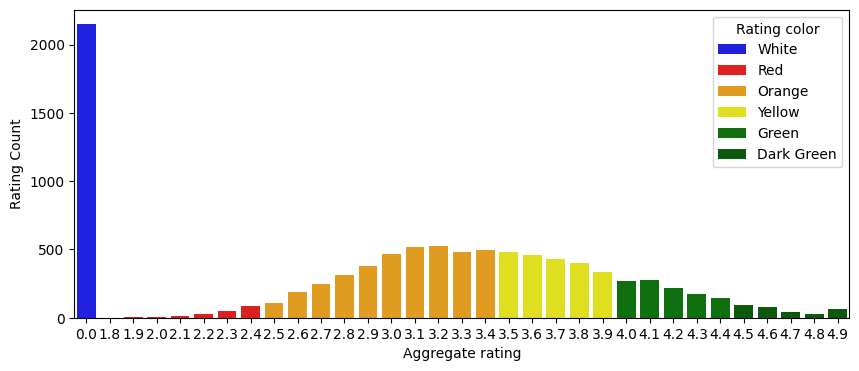

In [79]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings, hue='Rating color', palette=['blue', 'red', 'orange', 'yellow', 'green', 'darkgreen'])

---
### Observation
1. Not rated count is so high
2. Maximum number of rating is from 2.8 to 3.8
---


In [83]:
final_df.groupby(['Aggregate rating', 'Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [89]:
city_values = final_df.City.value_counts().values
city_names = final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x2df4d929c70>,
 [Text(-0.6207499702746028, 0.9081131396495042, 'New Delhi'),
  Text(0.07888824382658387, -1.0971675555656746, 'Gurgaon'),
  Text(0.8905335390443715, -0.6457166683903298, 'Noida'),
  Text(1.0945551812130687, -0.10931127700117002, 'Faridabad')],
 [Text(-0.338590892877056, 0.4953344398088204, '69.09%'),
  Text(0.043029951178136655, -0.5984550303085497, '14.11%'),
  Text(0.4857455667514753, -0.35220909184927074, '13.63%'),
  Text(0.597030098843492, -0.05962433290972909, '3.17%')])

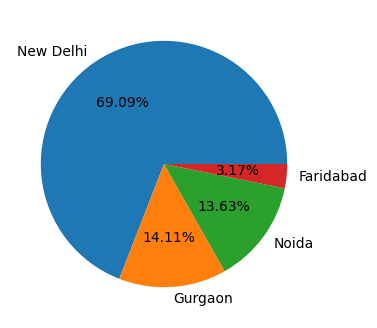

In [93]:
# pie chart
plt.figure(figsize=(6, 4))
plt.pie(city_values[:4], labels=city_names[:4], autopct="%1.2f%%")